In [50]:
!pip install sklearn

# 목표
- 학생 성적을 예측하는 회귀 모델을 만들어보자!
- keras를 이용해 신경망을 구성하는 방법을 연습해보자!

In [51]:
# 데이터 로딩

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# 데이터가 ; 으로 구분된 파일을 로드
# delimiter : csv파일에서 구분자를 설정해주는 명령
data = pd.read_csv("DataFiles/student-mat.csv", delimiter=";")

In [104]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [55]:
#  데이터 프레임에서 모든 컬럼들을 표시(None : 컬럼을 무제한으로 표시)
pd.set_option("display.max_columns", None)

In [56]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [57]:
data.shape

(395, 33)

- 문제,정답 분리

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# 문제는 studytime, 정답은 G3로 설정해보자
X = data['studytime'] # 문제
y = data['G3'] # 정답

In [60]:
X.shape, y.shape

((395,), (395,))

In [61]:
# 학습, 평가, 문제, 정답 데이터를 자동으로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296,)
(99,)
(296,)
(99,)


# 신경망 모델 만들기
- 신경망 구조 설계
- 신경망 학습/평가 방법 설정
- 학습 및 학습과정 시각화
- 모델 평가

In [63]:
# 1. 신경망 구조 설계
# Sequential : 신경망의 뼈대를 구축하기 위한 모듈
from tensorflow.keras import Sequential
# InputLayer : 신경망의 입력층을 생성, Dense : 신경망 층(뉴런의 묶음)을 구성해주는 모듈
from tensorflow.keras.layers import InputLayer, Dense

### 신경망 구조 설계 

In [64]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 설정
# Input_shape : 입력 데이터의 특성 형태를 설정(1개의특성, 1차원데이터)
model.add(InputLayer(input_shape=(1,)))


# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령, ()안의 숫자는 하나의 층에 생성해줄 총 뉴련의 개수
model.add(Dense(1))
# 결국 출력되는 결과는 출력층에 예측 점수 하나이므로 뉴런 하나가 됨

# 설계된 신경망의 정보를 용약해서 출력
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 신경망 학습/평가 방법 설정

In [65]:
model.compile(loss = 'mse',    # 손실함수(비용함수) : MSE(평균제곱오차)
              optimizer = 'SGD'    # 최적화함수 : 경사하강법의 방법을 설정( SGD : 확률적 경사하강법)
             )

###  학습 및 학습과정 

In [66]:
h = model.fit(X_train, y_train, epochs=100) # epochs : 학습 횟수를 설정

Train on 296 samples
Epoch 1/100
296/296 [==============================] - 0s 852us/sample - loss: 79.0892
Epoch 2/100
296/296 [==============================] - 0s 61us/sample - loss: 30.9183
Epoch 3/100
296/296 [==============================] - 0s 57us/sample - loss: 26.9287
Epoch 4/100
296/296 [==============================] - 0s 61us/sample - loss: 26.5297
Epoch 5/100
296/296 [==============================] - 0s 54us/sample - loss: 26.2129
Epoch 6/100
296/296 [==============================] - 0s 51us/sample - loss: 25.8538
Epoch 7/100
296/296 [==============================] - 0s 51us/sample - loss: 25.6313
Epoch 8/100
296/296 [==============================] - 0s 51us/sample - loss: 25.3560
Epoch 9/100
296/296 [==============================] - 0s 51us/sample - loss: 25.1699
Epoch 10/100
296/296 [==============================] - 0s 44us/sample - loss: 24.8893
Epoch 11/100
296/296 [==============================] - 0s 47us/sample - loss: 24.6753
Epoch 12/100
296/296 [========

296/296 [==============================] - 0s 47us/sample - loss: 20.2130
Epoch 96/100
296/296 [==============================] - 0s 47us/sample - loss: 20.2349
Epoch 97/100
296/296 [==============================] - 0s 47us/sample - loss: 20.2076
Epoch 98/100
296/296 [==============================] - 0s 44us/sample - loss: 20.2065
Epoch 99/100
296/296 [==============================] - 0s 47us/sample - loss: 20.1883
Epoch 100/100
296/296 [==============================] - 0s 47us/sample - loss: 20.2431


### 시각화

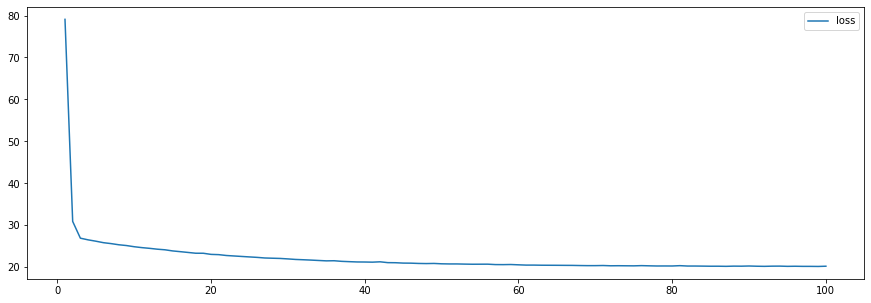

In [67]:
plt.figure(figsize=(15,5))

# 라인 차트를 생성
plt.plot(range(1,101),  # epochs 가 100까지 설정을 했기 때문에
            h.history['loss'],    # history : 학습시 출력되는 loss 혹은 정확도 값을 가져오기 위한 명령
            label='loss')
plt.legend() # 범례표시
plt.show()

- 초반에는 빠르게 MSE(loss값)가 떨어지고 있다.
- 경사하강법 초반에는 가중치(w), 절편(b) 값이 임의의 값으로 설정되어 있게 때문에 몇번만 최적화(학습)를 시켜도 MSE가 빠르게 줄어드는 것을 볼 수 있다.
- 중, 후반 부터는 학습이 더 이상 일어나지 않고 있다.

### 모델평가 

In [68]:
model.evaluate(X_test, y_test)

99/99 [==============================] - 0s 394us/sample - loss: 23.0075


23.007533294985993

# 입력 특성이 2개인 모델을 직접 만들어보자~!
- 문제(입력특성 2개 : studytime, traveltime) - X1
- 정답(G3) - y1
- 최종 출력의 뉴런 개수는 1개

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 데이터가 ; 으로 구분된 파일을 로드
# delimiter : csv파일에서 구분자를 설정해주는 명령
data = pd.read_csv("DataFiles/student-mat.csv", delimiter=";")
# 1. 신경망 구조 설계
# Sequential : 신경망의 뼈대를 구축하기 위한 모듈
from tensorflow.keras import Sequential
# InputLayer : 신경망의 입력층을 생성, Dense : 신경망 층(뉴런의 묶음)을 구성해주는 모듈
from tensorflow.keras.layers import InputLayer, Dense

In [70]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [81]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [96]:
# 문제는 studytime, 정답은 G3로 설정해보자
X1 = data.loc[:,['studytime','goout','Fedu','Medu','failures']] # 문제
y1 = data['G3'] # 정답

In [97]:
# 학습, 평가, 문제, 정답 데이터를 자동으로 분리
X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state=3)

In [98]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 설정
# Input_shape : 입력 데이터의 특성 형태를 설정(1개의특성, 1차원데이터)
model.add(InputLayer(input_shape=(5,)))


# 출력층 설정
# Dense : 하나의 층을 쌓아주는 명령, ()안의 숫자는 하나의 층에 생성해줄 총 뉴련의 개수
model.add(Dense(1))
# 결국 출력되는 결과는 출력층에 예측 점수 하나이므로 뉴런 하나가 됨

# 설계된 신경망의 정보를 용약해서 출력
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(loss = 'mse',    # 손실함수(비용함수) : MSE(평균제곱오차)
              optimizer = 'SGD'    # 최적화함수 : 경사하강법의 방법을 설정( SGD : 확률적 경사하강법)
             )

In [100]:
h = model.fit(X_train, y_train, epochs=100) # epochs : 학습 횟수를 설정

Train on 296 samples
Epoch 1/100
296/296 [==============================] - 0s 612us/sample - loss: 48.3664
Epoch 2/100
296/296 [==============================] - 0s 71us/sample - loss: 23.9175
Epoch 3/100
296/296 [==============================] - 0s 64us/sample - loss: 23.6129
Epoch 4/100
296/296 [==============================] - 0s 51us/sample - loss: 23.2442
Epoch 5/100
296/296 [==============================] - 0s 67us/sample - loss: 22.7284
Epoch 6/100
296/296 [==============================] - 0s 51us/sample - loss: 22.5234
Epoch 7/100
296/296 [==============================] - 0s 57us/sample - loss: 22.3452
Epoch 8/100
296/296 [==============================] - 0s 47us/sample - loss: 23.0213
Epoch 9/100
296/296 [==============================] - 0s 44us/sample - loss: 22.4631
Epoch 10/100
296/296 [==============================] - 0s 74us/sample - loss: 22.4808
Epoch 11/100
296/296 [==============================] - 0s 57us/sample - loss: 21.9650
Epoch 12/100
296/296 [========

296/296 [==============================] - 0s 44us/sample - loss: 18.9743
Epoch 96/100
296/296 [==============================] - 0s 57us/sample - loss: 19.5611
Epoch 97/100
296/296 [==============================] - 0s 44us/sample - loss: 18.9289
Epoch 98/100
296/296 [==============================] - 0s 61us/sample - loss: 19.3932
Epoch 99/100
296/296 [==============================] - 0s 51us/sample - loss: 18.8413
Epoch 100/100
296/296 [==============================] - 0s 57us/sample - loss: 18.7709


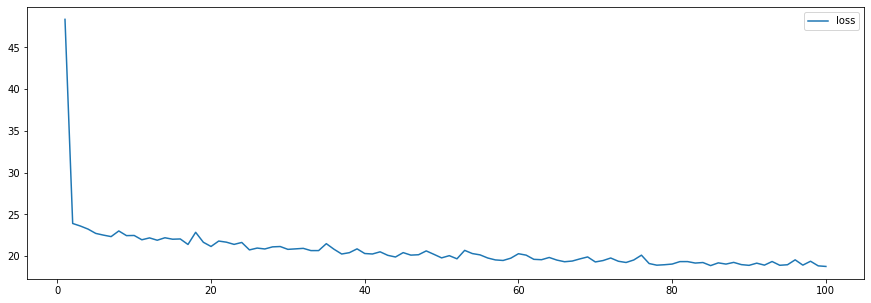

In [101]:
plt.figure(figsize=(15,5))

# 라인 차트를 생성
plt.plot(range(1,101),  # epochs 가 100까지 설정을 했기 때문에
            h.history['loss'],    # history : 학습시 출력되는 loss 혹은 정확도 값을 가져오기 위한 명령
            label='loss')
plt.legend() # 범례표시
plt.show()

In [102]:
model.evaluate(X_test, y_test)

99/99 [==============================] - 0s 444us/sample - loss: 20.5792


20.579173145872176